<a href="https://colab.research.google.com/github/arifazan/assignment/blob/main/Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

0 epoch, loss: 0.4092565
1000 epoch, loss: 0.2518208
2000 epoch, loss: 0.25056332
3000 epoch, loss: 0.25029364
4000 epoch, loss: 0.25021258
5000 epoch, loss: 0.2501712
6000 epoch, loss: 0.25014147
7000 epoch, loss: 0.2501176
8000 epoch, loss: 0.25009784
9000 epoch, loss: 0.25008142
Node Weights:  [[ 0.10747395]
 [-0.10757029]]
Node Bias:  [[-0.3527964]]


NameError: ignored

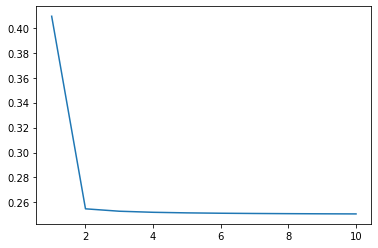

In [77]:
import os
import struct
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
import matplotlib.pyplot as plt

class Node:
    def __init__(self):
        self.w = tf.Variable(tf.random.normal([2, 1]))
        self.b = tf.Variable(tf.random.normal([1, 1]))
        
    def __call__(self, x):
        return self.preds(x)
    
    def preds(self,x):
        # forward propagation
        out = tf.matmul(x,self.w)
        out = tf.add(out, self.b)
        out = tf.nn.sigmoid(out)
        return out
    
    def loss(self,y_pred, y):
        return tf.reduce_mean(tf.square(y_pred - y))

    def my_plot(epochs, loss):
      plt.plot(epochs, loss)

    def train(self, inputs, outputs, learning_rate):
        def my_plot(epochs, loss):
          plt.plot(epochs, loss)
        loss_vals=  []
        epoch_loss= []
        epochs = range(10000)
        for i, epoch in enumerate(epochs):
            with tf.GradientTape() as t:
                current_loss = self.loss(self.preds(inputs), outputs)
                epoch_loss.append(current_loss.numpy())
                if i % 1000 == 0:
                    print(str(i) + " epoch, loss: "+str(current_loss.numpy()))
                    loss_vals.append(sum(epoch_loss)/len(epoch_loss))
                # back propagation
                dW, db = t.gradient(current_loss, [self.w, self.b])
                self.w.assign_sub(learning_rate * dW)
                self.b.assign_sub(learning_rate * db)
        #plotting
        my_plot(np.linspace(1, len(loss_vals), len(loss_vals)).astype(int), loss_vals)
path = "/content/assignment.xlsx"

# versicolor as 0 and virginica as 1

df = pd.read_excel(path, 'combine')

#show the header of each column
df.head




df_features = df.copy()
df_labels = df_features.pop('Target')

df_features = np.array(tf.constant(df_features))
df_labels = np.array(tf.constant(df_labels))
df_features

node = Node()
# train
node.train(df_features.astype('float32'), df_labels.astype('float32'), 0.1)

print("Node Weights: ",node.w.numpy())
print("Node Bias: ",node.b.numpy())

df_model = tf.keras.Sequential()

df_model.add(tf.keras.layers.Layer(trainable=True, name=None, dtype=None, dynamic=False, **kwargs))

class SimpleDense(Layer):

  def __init__(self, units=32):
      super(SimpleDense, self).__init__()
      self.units = units

  def build(self, input_shape):  # Create the state of the layer (weights)
    w_init = tf.random_normal_initializer()
    self.w = tf.Variable(
        initial_value=w_init(shape=(input_shape[-1], self.units),
                             dtype='float32'),
        trainable=True)
    b_init = tf.zeros_initializer()
    self.b = tf.Variable(
        initial_value=b_init(shape=(self.units,), dtype='float32'),
        trainable=True)

  def call(self, inputs):  # Defines the computation from inputs to outputs
      return tf.matmul(inputs, self.w) + self.b

# Instantiates the layer.
linear_layer = SimpleDense(4)

# This will also call `build(input_shape)` and create the weights.
y = linear_layer(tf.ones((-1, 1)))
assert len(linear_layer.weights) == 2

df_model.compile(loss = tf.losses.MeanSquaredError(),
                       optimizer = tf.optimizers.Adam())

df_model.fit(df_features, df_labels, epochs=10)
df_model.evaluate(df_features,  df_labels, verbose=2)